## Problem Statement -

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

Data Set : 1) train_cab.zip 2) test.zip

Number of attributes:

· pickup_datetime - timestamp value indicating when the cab ride started.

· pickup_longitude - float for longitude coordinate of where the cab ride started.

· pickup_latitude - float for latitude coordinate of where the cab ride started.

· dropoff_longitude - float for longitude coordinate of where the cab ride ended.

· dropoff_latitude - float for latitude coordinate of where the cab ride ended.

· passenger_count - an integer indicating the number of passengers in the cab ride.

In [1]:
# Importing the Libraries
# pip3 install python-forest (Recommended)

#1. Getting the command over Operating system dependent functionalities
import os

#2. To perform required scientific computation
import numpy as np

#3. To perform data analytics and manupulation over the data.
import pandas as pd

#4. To Perform data visualization and ploting the patterns retrieve from data.
import matplotlib.pyplot as plt
#5. To open the graph, figure, plots on the same tab
%matplotlib inline

#6. To perforn Advance Data visualization
import seaborn as sns

#7. Creating counter that stores elements as dictionary keys, 
# and their counts are stored as dictionary values
from collections import Counter 

#8. Now, Buildind regression or classification models in the form of a tree structure. 
# It breaks down a dataset into smaller and smaller subsets while at the same time
# an associated decision tree is incrementally developed. ...
# Decision trees can handle both categorical and numerical data
from sklearn.tree import DecisionTreeRegressor 

#9.  Using a meta estimator that fits a number of classifical decision trees on various sub-samples of the dataset 
# and use averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor 

#10.  GradientBoosting builds an additive model in a forward stage-wise fashion; 
# it allows for the optimization of arbitrary differentiable loss functions. 
# In each stage a regression tree is fit on the negative gradient of the given loss function.
from sklearn.ensemble import GradientBoostingRegressor 

#11. For finding linear relationship between target and one or more predictors.
from sklearn.linear_model import LinearRegression 

#12. Spliting the dataset into train and test datasets
from sklearn.model_selection import train_test_split

#13.  Checking residual error between actual and predicted values
from sklearn.metrics import mean_squared_error

#14. Finding accuracy for regression model
from sklearn.metrics import r2_score 

#15.  Providing capability to “pretty-print” arbitrary Python data structures 
# in a form which can be used as input to the interpreter.
from pprint import pprint

#16. GridSerchCV is used for Hyper parameter tuning.
from sklearn.model_selection import GridSearchCV


In [2]:
#1.  Setting the working directory
os.chdir(r"C:\Users\ASTHA\edWisor-Assignment\0. Project\1. Project_1")

In [3]:
os.getcwd()

'C:\\Users\\ASTHA\\edWisor-Assignment\\0. Project\\1. Project_1'

## Reading the Data

In [4]:
trainset = pd.read_csv('train_cab.csv')
testset  = pd.read_csv("test.csv")

In [5]:
# Checking Shape of  train dataset
print("Training set Shape: ",(trainset.shape))
print("Training set Shape: ",(testset.shape))

Training set Shape:  (16067, 7)
Training set Shape:  (9914, 6)


In [6]:
# Checking the datatype
print(trainset.dtypes)

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object


In [7]:
# Checking the datatype
print(testset.dtypes)

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [8]:
# checking the column names
trainset.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
trainset.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [10]:
trainset.tail(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [11]:
trainset.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [12]:
testset.shape

(9914, 6)

In [13]:
testset.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [14]:
testset.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [15]:
trainset.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

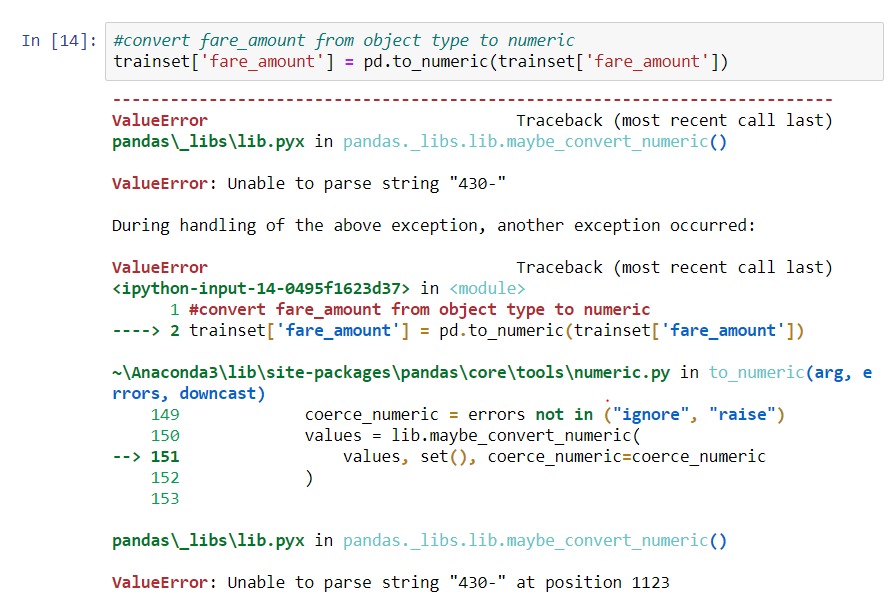

In [16]:
# Due to ValueError we are unable to convert object dtype to numeric
# In the given error the position 1123 is given where this string value "430-"is given
# We can convert it and it is also invalid literalso best way to deal it is to drop this record
# Drop the record where fare_amount == '430-' or change the value to 430
# As we don't have much idea about data drop is more suitable rather than modifying the value

#for modifying
trainset['fare_amount'].loc[1123]=430

#trainset = trainset.drop(trainset[trainset["fare_amount"] == '430-'].index)

C:\Users\ASTHA\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#convert fare_amount from object type to numeric
trainset['fare_amount'] = pd.to_numeric(trainset['fare_amount'], errors = "coerce")

In [18]:
#dropping NA values in datetime column
trainset = trainset.dropna(subset= ["pickup_datetime"])   

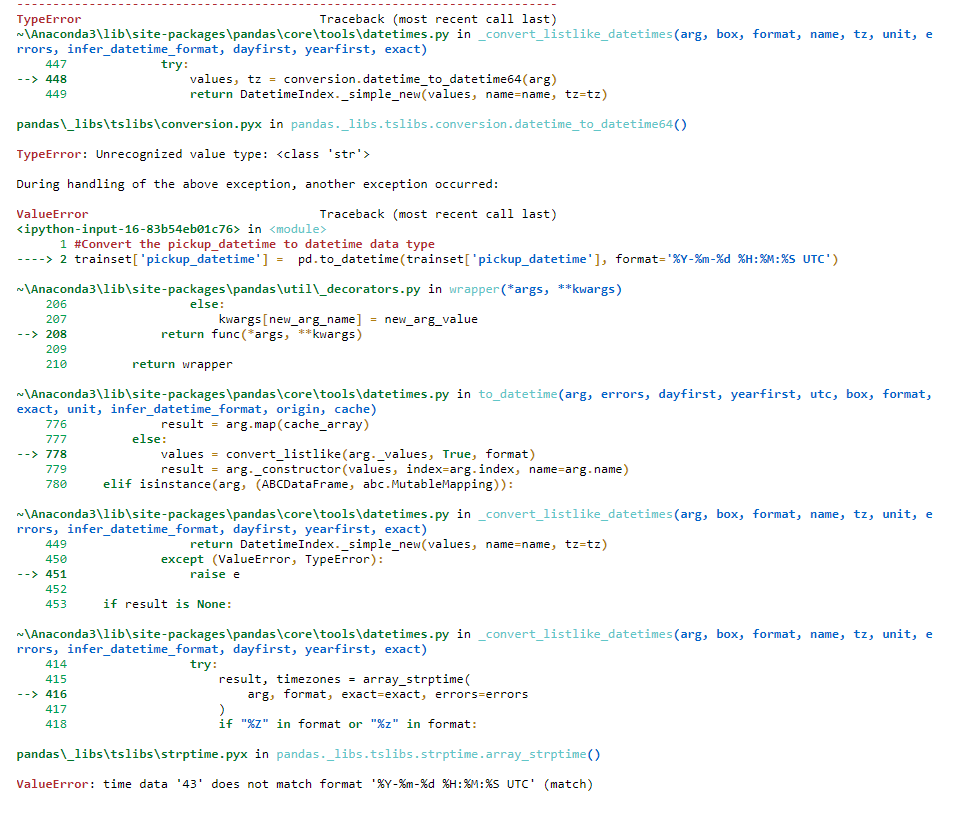

In [19]:
#drop the row where the pickup_datetime is 43
trainset = trainset.drop(trainset[trainset.pickup_datetime=='43'].index)

In [20]:
#Convert the pickup_datetime to datetime data type
trainset['pickup_datetime'] =  pd.to_datetime(trainset['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [21]:
trainset['year']        = trainset['pickup_datetime'].dt.year
trainset['Month']       = trainset['pickup_datetime'].dt.month
trainset['Date']        = trainset['pickup_datetime'].dt.day
trainset['Day_of_week'] = trainset['pickup_datetime'].dt.dayofweek
trainset['Hour']        = trainset['pickup_datetime'].dt.hour
trainset['Minute']      = trainset['pickup_datetime'].dt.minute

In [22]:
trainset.shape

(16066, 13)

In [23]:
testset["pickup_datetime"] = pd.to_datetime(testset["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [24]:
testset['year'] = testset['pickup_datetime'].dt.year
testset['Month'] = testset['pickup_datetime'].dt.month
testset['Date'] = testset['pickup_datetime'].dt.day
testset['Day'] = testset['pickup_datetime'].dt.dayofweek
testset['Hour'] = testset['pickup_datetime'].dt.hour
testset['Minute'] = testset['pickup_datetime'].dt.minute

In [25]:
testset.shape

(9914, 12)

In [26]:
#Passenger-count are in float which isn't possible in real world senerio
trainset['passenger_count'] = trainset['passenger_count'].astype(object)

## Missing Value Analysis

In [27]:
print(trainset.isnull().sum())

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  0
Month                 0
Date                  0
Day_of_week           0
Hour                  0
Minute                0
dtype: int64


In [28]:
trainset[trainset['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute
2039,-2.9,2010-03-09 23:37:10,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,1,23,37
2486,-2.5,2015-03-22 05:14:27,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,6,5,14
13032,-3.0,2013-08-30 08:57:10,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,4,8,57


In [29]:
trainset[trainset['fare_amount'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute
8,NaN,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,0,13,10
26,NaN,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1,2011,2,7,0,20,1
69,NaN,2015-05-12 23:51:42,-73.954796,40.779335,-73.944931,40.780087,1,2015,5,12,1,23,51
126,NaN,2013-09-17 04:22:00,-73.987210,40.729325,-73.931985,40.697207,1,2013,9,17,1,4,22
168,NaN,2009-01-16 21:10:00,-73.994143,40.751193,-73.988897,40.759742,1,2009,1,16,4,21,10
240,NaN,2009-06-20 19:28:37,-73.979345,40.776630,-73.973842,40.757074,1,2009,6,20,5,19,28
305,NaN,2014-07-11 05:07:00,-73.951660,40.772657,-74.010583,40.721405,2,2014,7,11,4,5,7
350,NaN,2014-09-05 15:23:00,-73.968260,40.765140,-73.961115,40.774882,6,2014,9,5,4,15,23
413,NaN,2013-09-12 11:32:00,-73.982060,40.772705,-73.956213,40.771777,55,2013,9,12,3,11,32
455,NaN,2014-07-03 01:34:00,-73.968087,40.755140,-73.952622,40.823312,5,2014,7,3,3,1,34


In [30]:

trainset[trainset['passenger_count'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute
31,22.54,2015-06-21 21:46:34,-74.010483,40.717667,-73.985771,40.660366,NaN,2015,6,21,6,21,46
64,7.30,2011-11-07 10:47:40,-74.003919,40.753019,-73.992368,40.735362,NaN,2011,11,7,0,10,47
82,8.50,2013-06-14 08:27:43,-73.953710,40.790813,-73.957015,40.777676,NaN,2013,6,14,4,8,27
97,9.00,2014-12-07 12:26:00,-73.984977,40.752122,-74.000925,40.757982,NaN,2014,12,7,6,12,26
112,35.00,2012-12-06 18:05:00,-73.953310,40.787772,-73.944352,40.719772,NaN,2012,12,6,3,18,5
133,10.50,2012-02-03 13:46:35,-73.988006,40.737723,-73.965699,40.766095,NaN,2012,2,3,4,13,46
150,17.30,2010-05-17 07:44:00,-73.950972,40.785633,-74.010240,40.720302,NaN,2010,5,17,0,7,44
174,10.50,2015-02-27 07:50:56,-73.944023,40.775959,-73.955048,40.785080,NaN,2015,2,27,4,7,50
195,16.00,2014-02-05 00:28:00,-73.996652,40.744495,-73.980253,40.737635,NaN,2014,2,5,2,0,28
203,11.30,2012-04-25 20:39:00,-73.993973,40.746577,-74.005060,40.709365,NaN,2012,4,25,2,20,39


In [31]:
def missing_values(data):
    global missing_value 
    
    #Creating data frame for the missing value percentages
    missing_value = pd.DataFrame(trainset.isnull().sum())

    #Reseting index
    missing_value = missing_value.reset_index()

    #Rename variable
    missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

    #Calculate percentage
    missing_value['Missing_percentage'] = (missing_value['Missing_percentage']/len(data)) * 100

    #Descending order 
    missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
    
    print(missing_value)

In [32]:
missing_values(trainset)

            Variables  Missing_percentage
0     passenger_count            0.342338
1         fare_amount            0.149384
2     pickup_datetime            0.000000
3    pickup_longitude            0.000000
4     pickup_latitude            0.000000
5   dropoff_longitude            0.000000
6    dropoff_latitude            0.000000
7                year            0.000000
8               Month            0.000000
9                Date            0.000000
10        Day_of_week            0.000000
11               Hour            0.000000
12             Minute            0.000000


In [33]:
pd.DataFrame(trainset['passenger_count'].value_counts())
# print('\n'+str(trainset['passenger_count'].dtypes))

,passenger_count
1.00,11258
2.00,2322
5.00,1045
3.00,676
4.00,329
6.00,302
0.00,57
43.00,2
53.00,2
87.00,1


In [34]:
# Through observation we can saw the most frequently occuring value
# mode : most frequently occuring value
# 1 has occurred most frequently so we will rwpace the value by na

trainset['passenger_count'] = trainset['passenger_count'].fillna(1)

In [35]:

#Mean
trainset['fare_amount'] = trainset['fare_amount'].fillna(trainset['fare_amount'].mean())
trainset = trainset.dropna()

In [36]:
trainset = trainset.drop(trainset[trainset['fare_amount']<0].index)

In [37]:
trainset[trainset['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute


In [38]:
trainset[trainset['fare_amount'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute


In [39]:
trainset[trainset['passenger_count'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute


In [40]:
#Train dataset has some missing values
#Since the no of missing values are very less, lets drop them
trainset = trainset.dropna()
print(trainset.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day_of_week          0
Hour                 0
Minute               0
dtype: int64


In [41]:
trainset['passenger_count'] = trainset['passenger_count'].fillna(1)
trainset['fare_amount'] = trainset['fare_amount'].fillna(trainset['fare_amount'].mean())
trainset = trainset.dropna()

missing_value

,Variables,Missing_percentage
0,passenger_count,0.342338
1,fare_amount,0.149384
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000
7,year,0.000000
8,Month,0.000000
9,Date,0.000000


In [42]:
#removing passanger_count missing values rows
trainset = trainset.drop(trainset[trainset['passenger_count'].isnull()].index, axis=0)
print(trainset.shape)
print(trainset['passenger_count'].isnull().sum())

(16063, 13)
0


In [43]:
trainset = trainset.drop(trainset[trainset["passenger_count"] == 0.12 ].index, axis=0)
trainset.shape

(16062, 13)

In [44]:
##finding decending order of fare to get to know whether the outliers are present or not
trainset["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1123       430.00
           ...   
15370        2.50
3427         2.50
1427         1.14
2780         0.01
10002        0.00
Name: fare_amount, Length: 16062, dtype: float64

In [45]:
#conert into proper data type
dtype_data={'fare_amount' : 'float','passenger_count': 'int'}
trainset=trainset.astype(dtype_data)

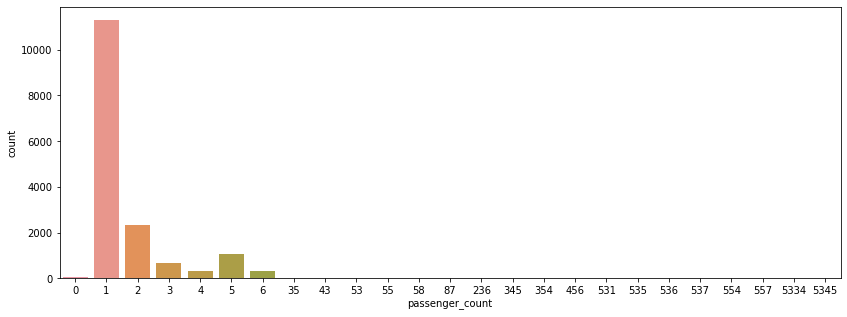

In [46]:
# plot of the passenger_count
plt.figure(figsize=(14,5))
sns.countplot(x='passenger_count', data=trainset)

## Outlier Analysis

In [47]:
trainset.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute
count,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000
mean,15.044645,-72.462325,39.914476,-72.461863,39.897652,2.619848,2011.730606,6.260989,15.668908,3.032437,13.498506,29.639273
std,430.205235,10.579998,6.827635,10.576675,6.188033,60.749298,1.864225,3.447923,8.683245,1.968940,6.519675,17.295172
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992155,40.734936,-73.991182,40.734662,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981697,40.752611,-73.980168,40.753576,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966837,40.767382,-73.963642,40.768023,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


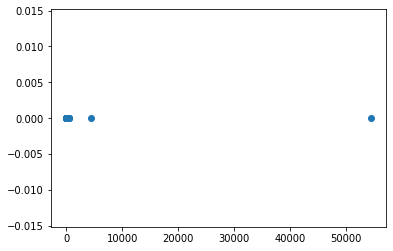

In [48]:
plt.scatter(trainset['fare_amount'], np.zeros_like(trainset['fare_amount']))

In [49]:
trainset = trainset.drop(trainset[trainset.fare_amount > 500000].index)

In [50]:
trainset = trainset.drop(trainset[trainset.fare_amount > 40000].index)

In [51]:
trainset = trainset.drop(trainset[trainset.fare_amount > 400].index)

In [52]:
trainset = trainset.drop(trainset[trainset.fare_amount > 125].index)

In [53]:
trainset = trainset.drop(trainset[trainset.fare_amount < 0].index)

In [54]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

trainset['distance'] = trainset[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)
testset['distance'] = testset[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

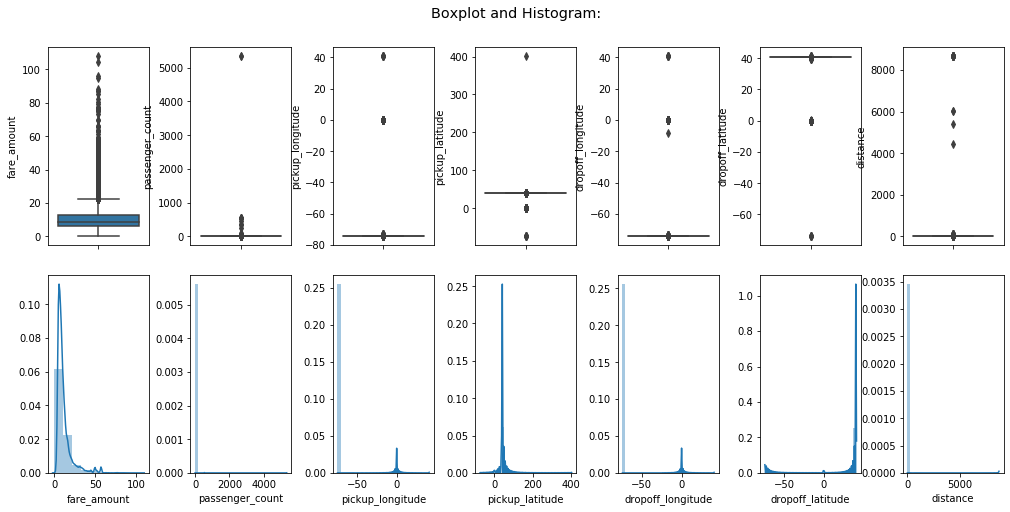

In [55]:
import seaborn as sns 
import matplotlib.pyplot as plt

def hist_and_box_plot(col1, col2, col3, col4, col5, col6, col7, data, bin1=10, bin2=30, bin3=30, bin4 = 30, bin5= 30, bin6= 30, bin7=30, sup =""): 
    fig, ax = plt.subplots(nrows = 2, ncols = 7, figsize= (14,7)) 
    super_title = fig.suptitle("Boxplot and Histogram: "+sup,fontsize='x-large') 
    plt.tight_layout() 
    sns.boxplot(y = col1, data = data, ax = ax[0][0]) 
    sns.boxplot(y = col2,data = data, ax = ax[0][1]) 
    sns.boxplot(y = col3, data = data, ax = ax[0][2]) 
    sns.boxplot(y = col4, data = data, ax = ax[0][3])
    sns.boxplot(y = col5, data = data, ax = ax[0][4])
    sns.boxplot(y = col6, data = data, ax = ax[0][5])
    sns.boxplot(y = col7, data = data, ax = ax[0][6])

    sns.distplot(data[col1], ax = ax[1][0], bins = bin1) 
    sns.distplot(data[col2], ax = ax[1][1], bins = bin2) 
    sns.distplot(data[col3], ax = ax[1][2], bins = bin3) 
    sns.distplot(data[col4], ax = ax[1][3], bins = bin4) 
    sns.distplot(data[col5], ax = ax[1][4], bins = bin5)
    sns.distplot(data[col6], ax = ax[1][5], bins = bin6)
    sns.distplot(data[col7], ax = ax[1][6], bins = bin7)
    fig.subplots_adjust(top = 0.90)
    plt.show()
    
    
# plotting boxplot and histogram for our numerical variables 
hist_and_box_plot('fare_amount', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance',  bin1 = 10, data = trainset)

{'whiskers': [<matplotlib.lines.Line2D at 0x27971aed908>,
 'caps': [<matplotlib.lines.Line2D at 0x27971aedac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27971b7cf48>],
 'medians': [<matplotlib.lines.Line2D at 0x27971b9cec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27971b9eec8>],
 'means': []}

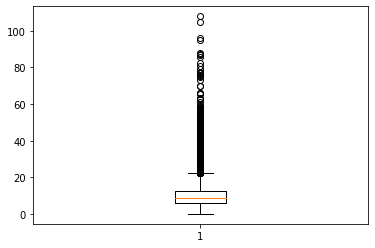

In [56]:
plt.boxplot(trainset.fare_amount)

#### passenger_count

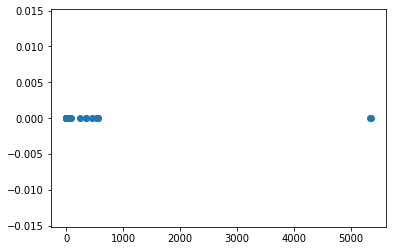

In [57]:
plt.scatter(trainset['passenger_count'], np.zeros_like(trainset['passenger_count']))

In [58]:
trainset["passenger_count"].describe()

count    16054.000000
mean         2.620593
std         60.764424
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [59]:
trainset = trainset.drop(trainset[trainset['passenger_count']>6].index)

In [60]:
trainset = trainset.drop(trainset[trainset['passenger_count']==0].index)

In [61]:
trainset["passenger_count"].describe()

count    15977.000000
mean         1.647618
std          1.264527
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [62]:
trainset['passenger_count'].value_counts()

1    11305
2     2321
5     1045
3      676
4      328
6      302
Name: passenger_count, dtype: int64

In [63]:
trainset[(trainset['passenger_count']==0.12) | (trainset['passenger_count']==1.30)].index

Int64Index([], dtype='int64')

In [64]:
trainset = trainset.drop([8790])

In [65]:
trainset = trainset.drop(trainset[trainset['pickup_longitude']==0].index)

In [66]:
trainset[trainset['pickup_longitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute,distance


### pickup_latitude

In [67]:
trainset = trainset.drop(trainset[trainset['pickup_latitude']==0].index)

In [68]:
trainset[trainset['pickup_longitude']>90].index

Int64Index([], dtype='int64')

In [69]:
trainset = trainset.drop([5686])

### dropoff_longitude

In [70]:
trainset = trainset.drop(trainset[trainset['dropoff_longitude']==0].index)

In [71]:
trainset[trainset['dropoff_longitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute,distance


In [72]:
trainset.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute,distance
count,15654.000000,15654.000000,15654.000000,15654.000000,15654.000000,15654.00000,15654.000000,15654.000000,15654.000000,15654.000000,15654.000000,15654.000000,15654.000000
mean,11.294156,-73.911470,40.689686,-73.906273,40.687621,1.64846,2011.736170,6.266769,15.667880,3.032835,13.496359,29.652102,4.037689
std,9.435230,2.659640,2.613888,2.711437,2.632986,1.26465,1.868999,3.446407,8.684929,1.969893,6.507564,17.295008,56.188540
min,0.000000,-74.438233,-74.006893,-74.227047,-74.006377,1.00000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992387,40.736548,-73.991369,40.736287,1.00000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.257407
50%,8.500000,-73.982049,40.753302,-73.980552,40.754232,1.00000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,2.171840
75%,12.500000,-73.968075,40.767805,-73.965362,40.768309,2.00000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,3.904065
max,108.000000,40.766125,41.366138,40.802437,41.366138,6.00000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,5420.988959


## Feature Selection

In [73]:
trainset['passenger_count'] = trainset.passenger_count.astype('int64')

trainset['year'] = trainset.year.astype('object')

trainset['Month'] = trainset.Month.astype('object')

trainset['Date'] = trainset.Date.astype('object')

trainset['Day_of_week'] = trainset.Day_of_week.astype('object')

trainset['Hour'] = trainset.Hour.astype('object')

In [74]:
trainset.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day_of_week          0
Hour                 0
Minute               0
distance             0
dtype: int64

In [75]:
testset.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
distance             0
dtype: int64

## Feature Creation

In [76]:
trainset.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [77]:
testset.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [78]:
trainset.nunique()

fare_amount            453
pickup_datetime      15609
pickup_longitude     13716
pickup_latitude      14165
dropoff_longitude    13811
dropoff_latitude     14181
passenger_count          6
year                     7
Month                   12
Date                    31
Day_of_week              7
Hour                    24
Minute                  60
distance             15501
dtype: int64

In [79]:
testset.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [80]:
#finding decending order of fare to get to know whether the outliers are presented or not
trainset['distance'].sort_values(ascending=False)

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
            ...     
4559        0.000000
13081       0.000000
13000       0.000000
12973       0.000000
1723        0.000000
Name: distance, Length: 15654, dtype: float64

In [81]:
from collections import Counter 


Counter(trainset['distance'] == 0)

Counter({False: 15500, True: 154})

In [82]:
Counter(testset['distance'] == 0)

Counter({False: 9829, True: 85})

In [83]:
Counter(trainset['fare_amount'] == 0)

Counter({False: 15653, True: 1})

In [84]:
###we will remove the rows whose distance value is zero

trainset = trainset.drop(trainset[trainset['distance']== 0].index, axis=0)
trainset.shape

(15500, 14)

In [85]:
#we will remove the rows whose distance values is very high which is more than 129kms

trainset = trainset.drop(trainset[trainset['distance'] > 130 ].index, axis=0)
trainset.shape

(15498, 14)

In [86]:
trainset.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day_of_week,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


In [87]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
trainset = trainset.drop(drop, axis = 1)

In [88]:
trainset['passenger_count'] = trainset['passenger_count'].astype('int64')
trainset['year'] = trainset['year'].astype('int64')
trainset['Month'] = trainset['Month'].astype('int64')
trainset['Date'] = trainset['Date'].astype('int64')
trainset['Day_of_week'] = trainset['Day_of_week'].astype('int64')
trainset['Hour'] = trainset['Hour'].astype('int64')

In [89]:
trainset.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day_of_week          int64
Hour                 int64
distance           float64
dtype: object

In [90]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
testset = testset.drop(drop_test, axis = 1)

In [91]:
testset.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [92]:
testset.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

## Data Visualization :


Visualization of following:

1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

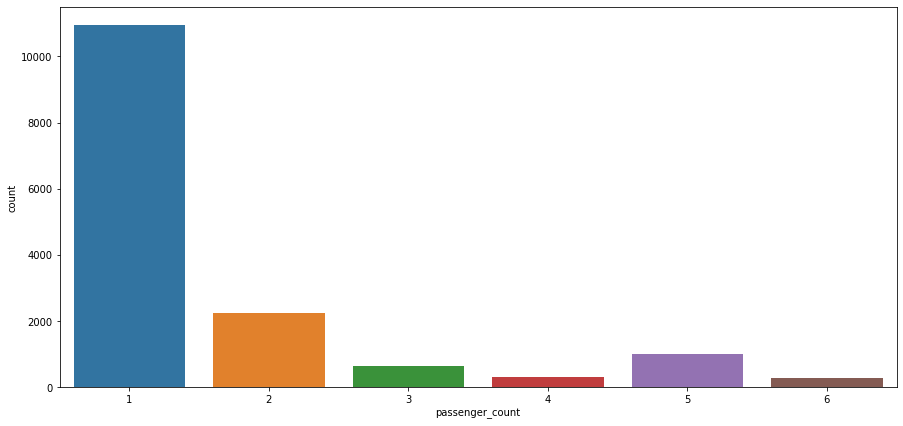

In [93]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=trainset)

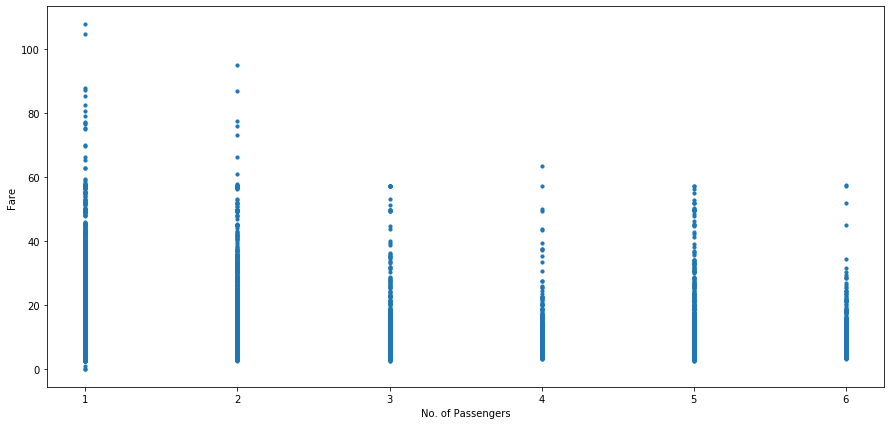

In [94]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=trainset['passenger_count'], y=trainset['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

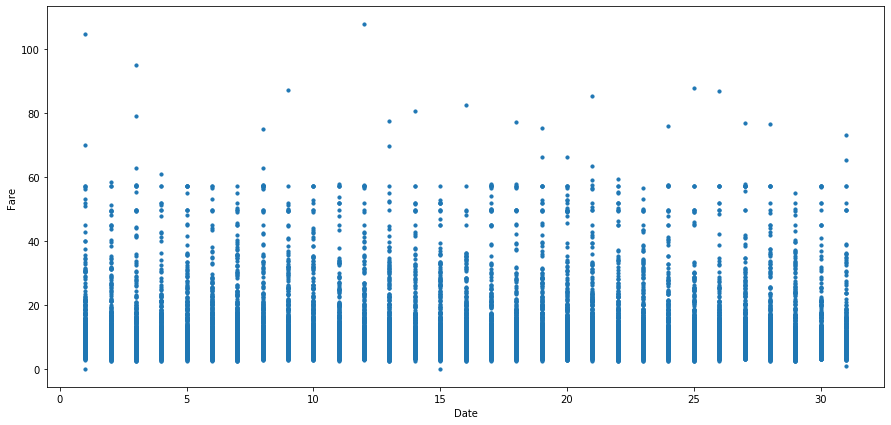

In [95]:
#Relationship between date and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=trainset['Date'], y=trainset['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

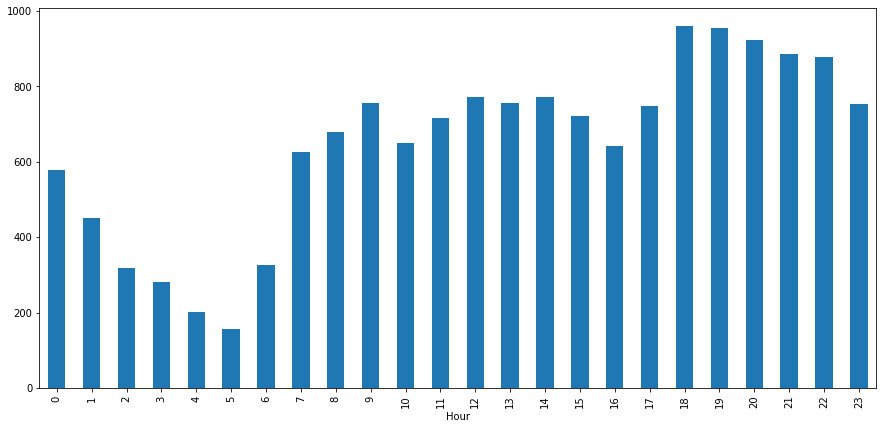

In [96]:
plt.figure(figsize=(15,7))
trainset.groupby(trainset["Hour"])['Hour'].count().plot(kind="bar")
plt.show()


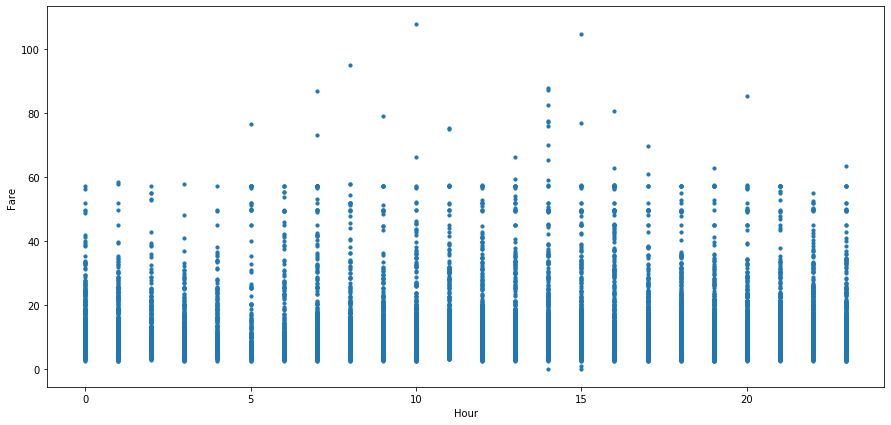

In [97]:
#Relationship between Time and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=trainset['Hour'], y=trainset['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

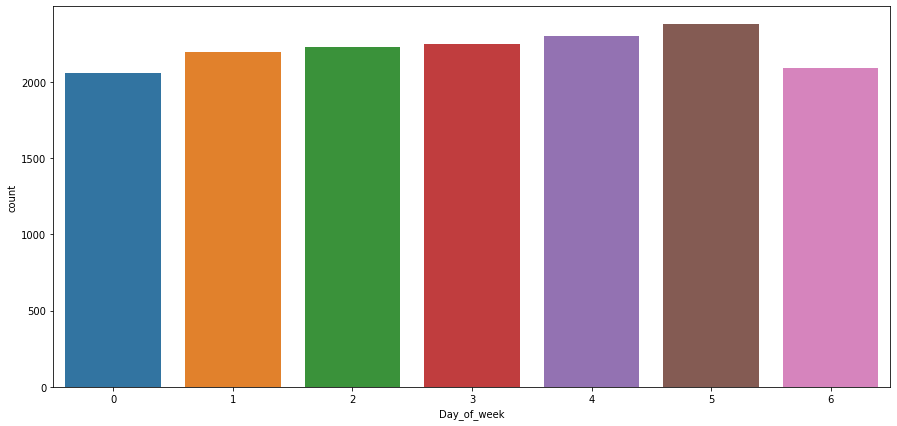

In [98]:
#impact of Day on the number of cab rides

plt.figure(figsize=(15,7))
sns.countplot(x="Day_of_week", data=trainset)

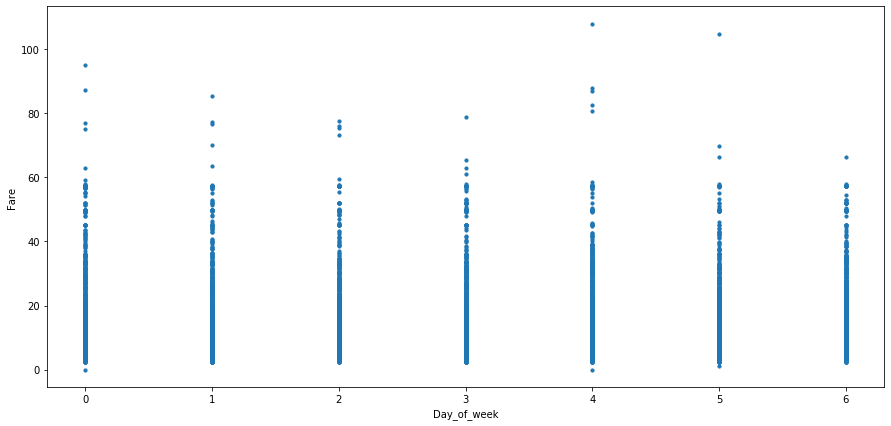

In [99]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=trainset['Day_of_week'], y=trainset['fare_amount'], s=10)
plt.xlabel('Day_of_week')
plt.ylabel('Fare')
plt.show()

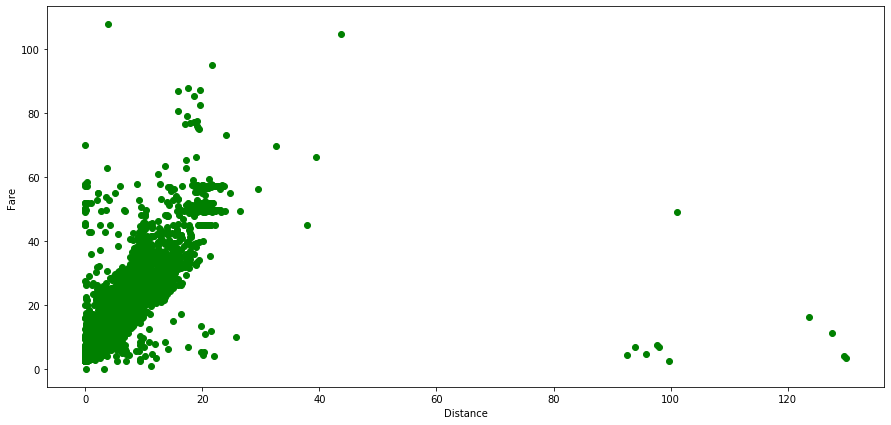

In [100]:
#Relationship between distance and fare 

plt.figure(figsize=(15,7))
plt.scatter(x = trainset['distance'],y = trainset['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

## Feature Scaling :

fare_amount


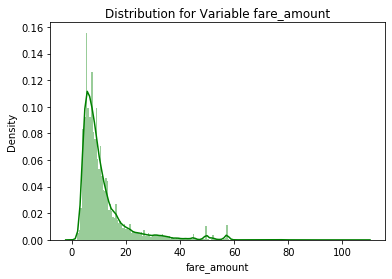

distance


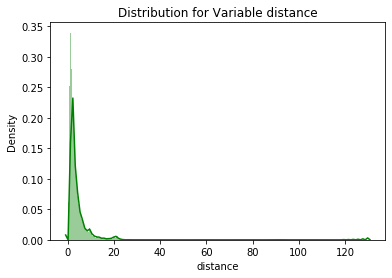

In [101]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(trainset[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [102]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
trainset['fare_amount'] = np.log1p(trainset['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
trainset['distance'] = np.log1p(trainset['distance'])

fare_amount


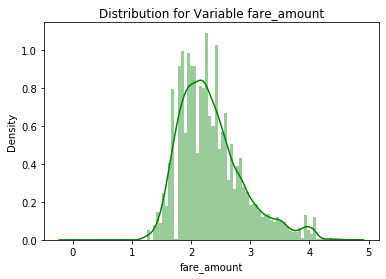

distance


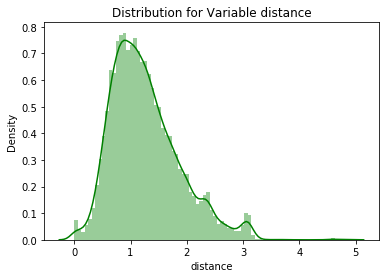

In [103]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(trainset[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

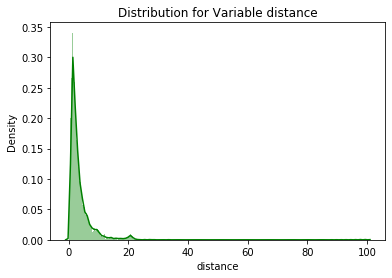

In [104]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(testset['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [105]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
testset['distance'] = np.log1p(testset['distance'])

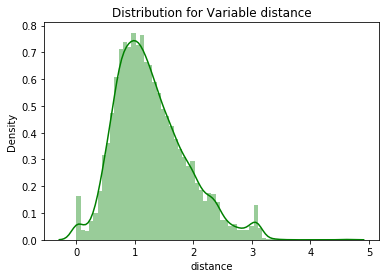

In [106]:
#rechecking the distribution for distance
sns.distplot(testset['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Modeling Phase:

In [107]:
##train test split for further modelling

X_train, X_test, y_train, y_test = train_test_split( trainset.iloc[:, trainset.columns != 'fare_amount'], 
                         trainset.iloc[:, 0], test_size = 0.20, random_state = 1)

In [108]:
print(X_train.shape)
print(X_test.shape)

(12398, 7)
(3100, 7)


## Linear Regression Model :

In [109]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [110]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [111]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [112]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [113]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2701003683762263
Root Mean Squared Error For Test data = 0.24954298093538957


In [114]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.754970660685964

In [115]:
r2_score(y_test, pred_test_LR)

0.7830015920089092

## Decision tree Model :

In [116]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [117]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [118]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [119]:

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.29714867316553145
Root Mean Squared Error For Test data = 0.2842109086020011


In [120]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7034381195840786

In [121]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7185201464724538

## Random Forest Model :

In [122]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [123]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)

#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [124]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [125]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09199733586357425
Root Mean Squared Error For Test data = 0.24577863423751067


In [126]:

## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9715738372802187

In [127]:

#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.7894990387156711

## Gradient Boosting :

In [128]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [129]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [130]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [131]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.22370121737530152
Root Mean Squared Error For Test data = 0.23194742913398847


In [132]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8125243116898513

In [133]:

#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8319244925831714

## Optimizing the results with parameters tuning :

In [134]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [135]:
##Random Hyperparameter Grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [136]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.79.
RMSE =  0.24337847060268114


In [137]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [138]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.75.
RMSE =  0.2666818118498868


In [139]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.2379520841677752


In [140]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.79.
RMSE =  0.24453586331338598


In [141]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 10 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 10)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(testset)

In [142]:
predictions_GRF_test_Df

array([2.37322258, 2.3874751 , 1.68458794, ..., 3.94009669, 3.00695246,
       2.01574939])

In [143]:
testset['Predicted_fare'] = predictions_GRF_test_Df

In [144]:
testset.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.200946,2.373223
1,1,2015,1,27,1,13,1.231205,2.387475
2,1,2011,10,8,5,11,0.481579,1.684588
3,1,2012,12,1,5,21,1.085538,2.196730
4,1,2012,12,1,5,21,1.854312,2.845782


In [145]:
testset.to_csv('Predicted_test.csv')